# Hyperparameter Tuning with Python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Import Datasets

* Diabetes
* Heart Failure
* FB Live
* Telco Churn (assignment)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/churn.csv')

In [ ]:
# show first 5 columns of data
# data dictionary can be found at
# https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
data.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,NaN,No,1.0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Cleaning

## Tipe Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7046 entries, 0 to 7045
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7037 non-null   object 
 1   Gender            7030 non-null   object 
 2   SeniorCitizen     7034 non-null   float64
 3   Partner           7030 non-null   object 
 4   Dependents        7027 non-null   object 
 5   Tenure            7029 non-null   float64
 6   Contract          7033 non-null   object 
 7   PaperlessBilling  7033 non-null   object 
 8   PaymentMethod     7035 non-null   object 
 9   MonthlyCharges    7036 non-null   float64
 10  TotalCharges      7046 non-null   float64
 11  Churn             7046 non-null   object 
dtypes: float64(4), object(8)
memory usage: 660.7+ KB


## Missing Value

In [ ]:
# cek data yang hilang
counts = data.isna().sum().sort_values(ascending=False)

# persentase data yang hilang
percents = round(data.isna().mean() * 100, 2).sort_values(ascending=False)
null = pd.concat([counts, percents], axis=1, keys=["null_counts", "percents(%)"])
null

,null_counts,percents(%)
Dependents,19,0.27
Tenure,17,0.24
Gender,16,0.23
Partner,16,0.23
Contract,13,0.18
PaperlessBilling,13,0.18
SeniorCitizen,12,0.17
PaymentMethod,11,0.16
MonthlyCharges,10,0.14
customerID,9,0.13


In [ ]:
# Persentase record/rows yang mengandung missing value
data_nan = data[data.isna().any(axis=1)]
print(f'Persentase missing value pada dataset : {round(len(data_nan)/len(data)*100, 2)}%')

Persentase missing value pada dataset : 1.92%


In [ ]:
# Menghapus baris data dari missing value
data = data.dropna()

- Terdapat 5 feature yang memiliki missing value yaitu : `Dependents`, `Tenure`, `Gender`, `Partner`, `Contract`, `PaperlessBilling`,`SeniorCitizen`,`PaymentMethod`,`MonthlyCharges`, dan `customerID`
- Dataset memiliki 1.92% missing value (masih dibawah 10%), maka diputuskan untuk menghapus missing value

In [ ]:
# cek missing value
data.isna().sum()

customerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Duplicate Data

In [ ]:
# cek duplikat
data.duplicated().sum()

13

In [ ]:
# Menghapus data duplikat
data = data.drop_duplicates()

In [ ]:
# cek duplikat
data.duplicated().sum()

0

In [ ]:
data.tail(7)

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7025,7750-EYXWZ,Female,0.0,No,No,12.0,One year,No,Electronic check,60.65,743.30,No
7026,2569-WGERO,Female,0.0,No,No,72.0,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7027,6840-RESVB,Male,0.0,Yes,Yes,24.0,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0.0,Yes,Yes,72.0,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0.0,Yes,Yes,11.0,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1.0,Yes,No,4.0,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7031,3186-AJIEK,Male,0.0,No,No,66.0,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


##Pengelompokan Data Berdasarkan Tipe Data

In [ ]:
# cek feature yang memiliki nilai numerik
numeric = data_nan.loc[:, (data_nan.dtypes == int) | (data_nan.dtypes == float)].columns.tolist()
print(numeric)
print(f'Jumlah feature numerikal : {len(numeric)}')

['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges']
Jumlah feature numerikal : 4


In [ ]:
# cek data yang memiliki nilai kategorik
category = data_nan.loc[:, (data_nan.dtypes == object)].columns.tolist()
print(category)
print(f'Jumlah feature kategorikal : {len(category)}')

['customerID', 'Gender', 'Partner', 'Dependents', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Jumlah feature kategorikal : 8


In [ ]:
# split data berdasarkan kategori
numeric = ['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges']
category = ['customerID', 'Gender', 'Partner', 'Dependents', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [ ]:
# analisis deskriptif data numerikal
data[numeric].describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,6898.0,0.161931,0.368414,0.00,0.00,0.0,0.0000,1.00
Tenure,6898.0,32.433749,24.528786,1.00,9.00,29.0,55.0000,72.00
MonthlyCharges,6898.0,64.839439,30.100388,18.25,35.55,70.4,89.9000,118.75
TotalCharges,6898.0,2286.277320,2265.938904,18.80,401.15,1400.7,3807.8375,8684.80


In [ ]:
# analisis deskriptif data kategorikal
data[category].describe().T

,count,unique,top,freq
customerID,6898,6898,5575-GNVDE,1
Gender,6898,2,Male,3488
Partner,6898,2,No,3573
Dependents,6898,2,No,4845
Contract,6898,3,Month-to-month,3803
PaperlessBilling,6898,2,Yes,4088
PaymentMethod,6898,4,Electronic check,2309
Churn,6898,2,No,5073


In [ ]:
# Jumlah category
for col in category:
    print(f'''Value count kolom {col}:''')
    print('-' * 50)
    print(data[col].value_counts())
    print()

Value count kolom customerID:
--------------------------------------------------
5575-GNVDE    1
7550-WIQVA    1
7816-VGHTO    1
4007-NHVHI    1
5181-OABFK    1
             ..
9548-ZMVTX    1
2683-JXWQQ    1
7089-RKVSZ    1
0020-INWCK    1
3186-AJIEK    1
Name: customerID, Length: 6898, dtype: int64

Value count kolom Gender:
--------------------------------------------------
Male      3488
Female    3410
Name: Gender, dtype: int64

Value count kolom Partner:
--------------------------------------------------
No     3573
Yes    3325
Name: Partner, dtype: int64

Value count kolom Dependents:
--------------------------------------------------
No     4845
Yes    2053
Name: Dependents, dtype: int64

Value count kolom Contract:
--------------------------------------------------
Month-to-month    3803
Two year          1653
One year          1442
Name: Contract, dtype: int64

Value count kolom PaperlessBilling:
--------------------------------------------------
Yes    4088
No     2810
Name:

#Univariate Analysis

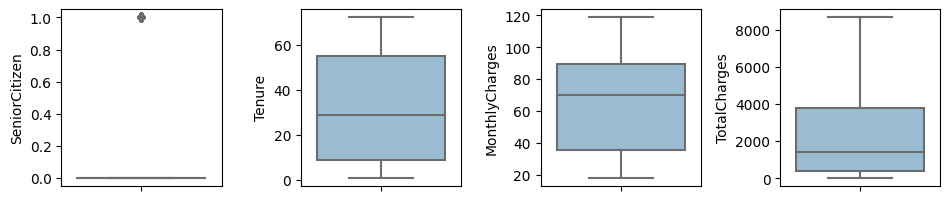

In [ ]:
# cek distribusi dan outlier menggunakan boxplot
plt.figure(figsize=(12, 6))
for i in range(0, len(numeric)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=data[numeric[i]], color='#91bfdb', orient='v')
    plt.tight_layout()

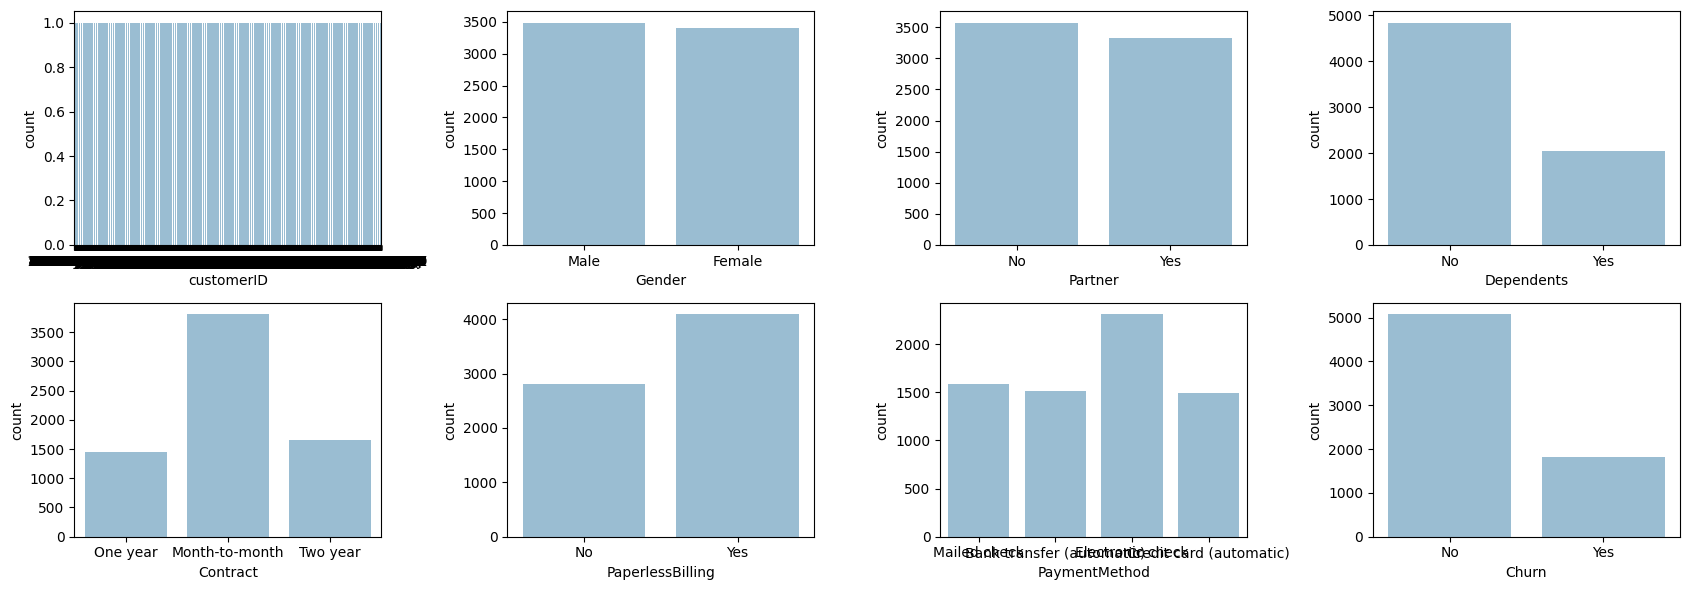

In [ ]:
# countplot feature kategorikal
plt.figure(figsize=(17, 6))
for i in range(0, len(category)):
    plt.subplot(2, 4, i+1)
    sns.countplot(x=data[category[i]], color='#91bfdb', orient='v')
    plt.tight_layout()

#Data Preprocessing

#Category 3

In [ ]:
PaymentMethod = pd.factorize(data['PaymentMethod'])[0]
Contract = pd.factorize(data['Contract'])[0]

cat_3 = pd.DataFrame()
cat_3['PaymentMethod'] = PaymentMethod
cat_3['Contract'] = Contract

In [ ]:
cat_3.head(2)

,PaymentMethod,Contract
0,0,0
1,0,1


#Numeric

In [ ]:
data_num = ['SeniorCitizen', 'Tenure', 'MonthlyCharges', 'TotalCharges']
data_num = data[data_num]
data_num.head(2)

,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges
1,0.0,34.0,56.95,1889.50
2,0.0,2.0,53.85,108.15


#Category

In [ ]:
data_cat = ['Gender','Partner','Dependents','PaperlessBilling','Churn']
data_cat = pd.get_dummies(data[data_cat])
data_cat.head(2)

,Gender_Female,Gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PaperlessBilling_No,PaperlessBilling_Yes,Churn_No,Churn_Yes
1,0,1,1,0,1,0,1,0,1,0
2,0,1,1,0,1,0,0,1,0,1


In [ ]:
data_cat = data_cat.drop(['Gender_Female'], axis=1)
data_cat = data_cat.drop(['Partner_No'], axis=1)
data_cat = data_cat.drop(['Dependents_No'], axis=1)
data_cat = data_cat.drop(['PaperlessBilling_No'], axis=1)
data_cat = data_cat.drop(['Churn_No'], axis=1)

data_cat_n = data_cat.rename(columns={"Gender_Male": "Gender"})
data_cat_n = data_cat_n.rename(columns={"Partner_Yes": "Partner"})
data_cat_n = data_cat_n.rename(columns={"Dependents_Yes": "Dependents"})
data_cat_n = data_cat_n.rename(columns={"PaperlessBilling_Yes": "PaperlessBilling"})
data_cat_n = data_cat_n.rename(columns={"Churn_Yes": "Churn"})
data_cat_n

,Gender,Partner,Dependents,PaperlessBilling,Churn
1,1,0,0,0,0
2,1,0,0,1,1
3,1,0,0,0,0
4,0,0,0,1,1
5,0,0,0,1,1
...,...,...,...,...,...
7027,1,1,1,1,0
7028,0,1,1,1,0
7029,0,1,1,1,0
7030,1,1,0,1,1


#Customer ID

In [ ]:
customerID = pd.factorize(data['customerID'])[0]

id = pd.DataFrame()
id['customerID'] = customerID

In [ ]:
id.head(5)

,customerID
0,0
1,1
2,2
3,3
4,4


In [ ]:
pre_Multicollinearity = pd.concat([cat_3, data_num], axis=1,join="inner")
for_Multicollinearity = pd.concat([pre_Multicollinearity, data_cat_n], axis=1,join="inner")

dataset1_final = pd.concat([id, cat_3], axis=1,join="inner")
dataset2_final = pd.concat([dataset1_final, data_num], axis=1,join="inner")
dataset_final = pd.concat([dataset2_final, data_cat_n], axis=1,join="inner")

In [ ]:
dataset_final

,customerID,PaymentMethod,Contract,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender,Partner,Dependents,PaperlessBilling,Churn
1,1,0,1,0.0,34.0,56.95,1889.50,1,0,0,0,0
2,2,1,0,0.0,2.0,53.85,108.15,1,0,0,1,1
3,3,2,1,0.0,45.0,42.30,1840.75,1,0,0,0,0
4,4,2,1,0.0,2.0,70.70,151.65,0,0,0,1,1
5,5,3,1,0.0,8.0,99.65,820.50,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6892,6892,1,2,0.0,35.0,69.00,2441.70,1,1,0,1,0
6893,6893,0,0,1.0,64.0,43.85,2751.00,0,0,0,1,0
6894,6894,3,0,0.0,30.0,44.50,1307.80,1,0,1,1,0
6895,6895,2,1,0.0,25.0,18.70,383.65,0,1,1,1,0


#Multivariate Analysis

##Multicollinearity

<Axes: >

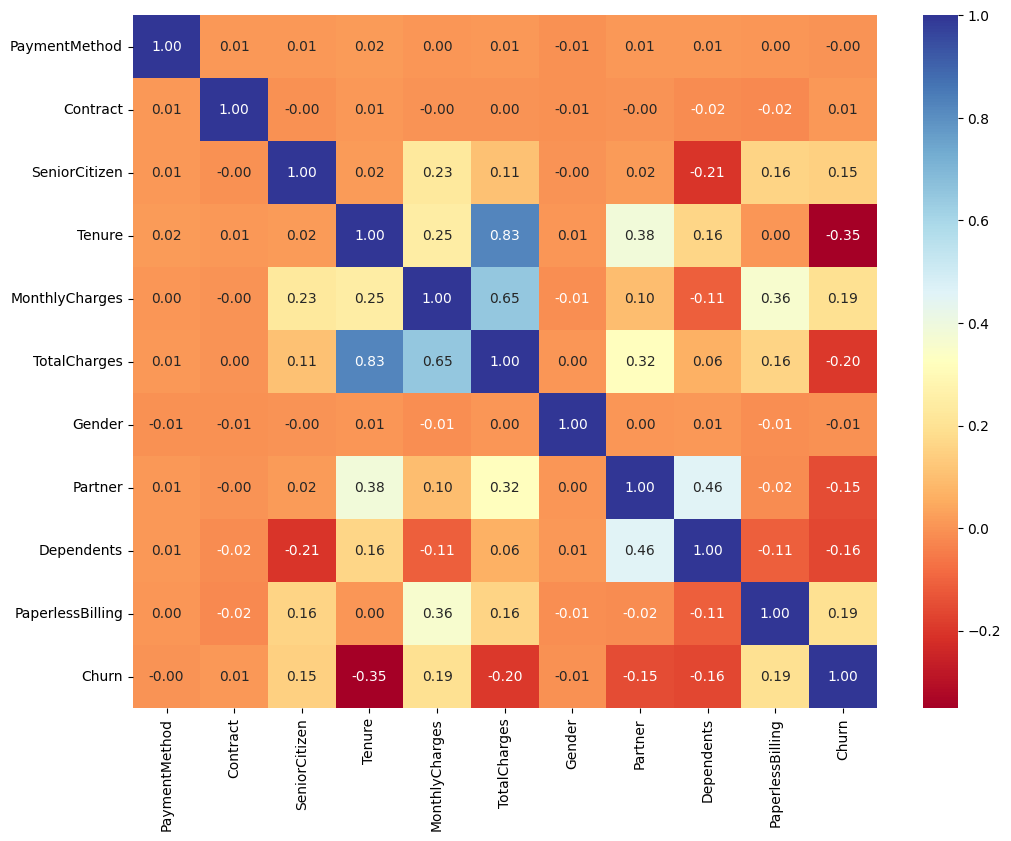

In [ ]:
# heatmap korelasi antar feature
plt.figure(figsize=(12,9))
sns.heatmap(for_Multicollinearity.corr(), cmap='RdYlBu', annot=True, fmt='.2f')

Fiture yang memiliki korelasi tinggi adalah `Tenure` dengan `TotalCharges` karena memiliki nilai 0.83

#Feature Selection

Diputuskan untuk menghapus data yang memiliki nilai korelasi sangat rendah = `PaymentMethod`, `Contract`, `Gender`

In [ ]:
dataset_final.head(1)

,customerID,PaymentMethod,Contract,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender,Partner,Dependents,PaperlessBilling,Churn
1,1,0,1,0.0,34.0,56.95,1889.5,1,0,0,0,0


# K-NN Classification

In [ ]:
# will use this dataset
dataset_final.head()

,customerID,PaymentMethod,Contract,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender,Partner,Dependents,PaperlessBilling,Churn
1,1,0,1,0.0,34.0,56.95,1889.50,1,0,0,0,0
2,2,1,0,0.0,2.0,53.85,108.15,1,0,0,1,1
3,3,2,1,0.0,45.0,42.30,1840.75,1,0,0,0,0
4,4,2,1,0.0,2.0,70.70,151.65,0,0,0,1,1
5,5,3,1,0.0,8.0,99.65,820.50,0,0,0,1,1


In [ ]:
# split the data
from sklearn.model_selection import train_test_split

X = dataset_final.drop(columns='Churn').to_numpy()
y = dataset_final[['Churn']].to_numpy()
y = y.reshape(len(y),) # sklean formatting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# It's important to choose the right metric when doing classification
dataset_final['Churn'].value_counts()

0    4976
1    1789
Name: Churn, dtype: int64

The class distribution is IMBALANCE, so need NOT to use `accuracy`. Use `recall` (sensitivity) instead! Churn is the most expensive thing to incure!

In [ ]:
# define the estimator/model
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

In [ ]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='recall')

In [ ]:
# the compact results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 2},0.172348,4
1,{'n_neighbors': 3},0.303690,1
2,{'n_neighbors': 4},0.164690,5
3,{'n_neighbors': 5},0.253646,2
4,{'n_neighbors': 6},0.152187,6
5,{'n_neighbors': 7},0.221685,3
6,{'n_neighbors': 8},0.148710,7


In [ ]:
# what if we also want to tune "weights" hyperparameter
# "uniform": all K neighbors have the same influence
# "distance": closer neighbor in those K neighbors has stronger influence
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}

# now we use recall (sensitivity) as metric
knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8),
                         'weights': ('uniform', 'distance')},
             scoring='recall')

In [ ]:
# the results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
1,"{'n_neighbors': 2, 'weights': 'distance'}",0.384998,1
3,"{'n_neighbors': 3, 'weights': 'distance'}",0.331480,2
5,"{'n_neighbors': 4, 'weights': 'distance'}",0.323130,3
2,"{'n_neighbors': 3, 'weights': 'uniform'}",0.303690,4
9,"{'n_neighbors': 6, 'weights': 'distance'}",0.290471,5
7,"{'n_neighbors': 5, 'weights': 'distance'}",0.288390,6
13,"{'n_neighbors': 8, 'weights': 'distance'}",0.260591,7
11,"{'n_neighbors': 7, 'weights': 'distance'}",0.259906,8
6,"{'n_neighbors': 5, 'weights': 'uniform'}",0.253646,9
10,"{'n_neighbors': 7, 'weights': 'uniform'}",0.221685,10


It seems that the recall is uniformly low (recall = only 38%) It suggests that K-NN model may underfit the data. Will try to use Random Forest later in below.

### Evaluation metrics on test data

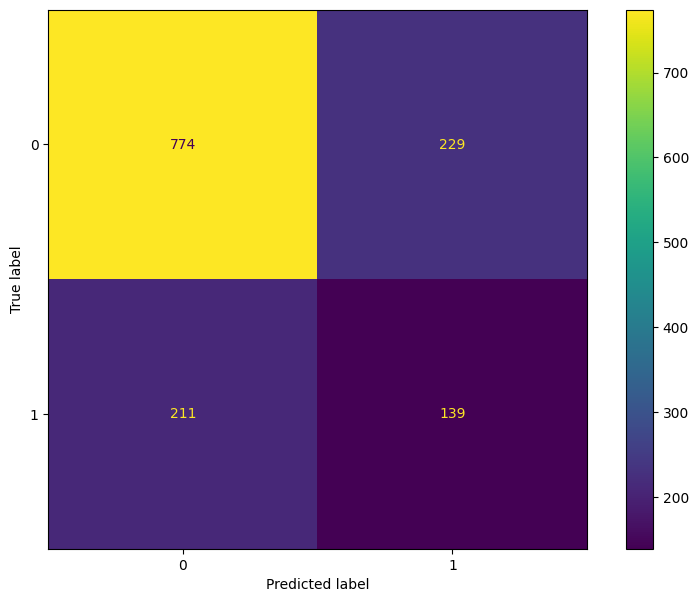

In [ ]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1003
           1       0.38      0.40      0.39       350

    accuracy                           0.67      1353
   macro avg       0.58      0.58      0.58      1353
weighted avg       0.68      0.67      0.68      1353



TIP: Just focus on the row '1'.
<br>
Finding: Yep, our model is not that good. The recall score on test data is only 0.46.

# K-means Clustering
*Spoiler: we won't use grid search CV*

In [ ]:
# fb live data
dataset_final.head(2)

,customerID,PaymentMethod,Contract,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender,Partner,Dependents,PaperlessBilling,Churn
1,1,0,1,0.0,34.0,56.95,1889.50,1,0,0,0,0
2,2,1,0,0.0,2.0,53.85,108.15,1,0,0,1,1


In [ ]:
# check column names
dataset_final.columns

Index(['customerID', 'PaymentMethod', 'Contract', 'SeniorCitizen', 'Tenure',
       'MonthlyCharges', 'TotalCharges', 'Gender', 'Partner', 'Dependents',
       'PaperlessBilling', 'Churn'],
      dtype='object')

In [ ]:
# drop unnecessary columns
# num_reactions is also dropped since it can be derived from the other columns in the dataset
X = dataset_final#.drop(columns=['Dependents','Contract']).to_numpy()
X = dataset_final

from sklearn.cluster import KMeans

# track sum of squared error
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

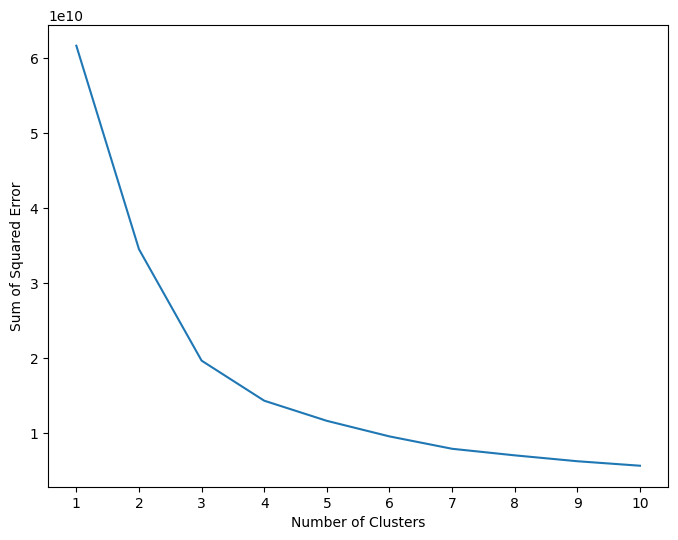

In [ ]:
# draw the SSE decline progression
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Error")
plt.show()

In [ ]:
dataset_final.head(3)

,customerID,PaymentMethod,Contract,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender,Partner,Dependents,PaperlessBilling,Churn
1,1,0,1,0.0,34.0,56.95,1889.50,1,0,0,0,0
2,2,1,0,0.0,2.0,53.85,108.15,1,0,0,1,1
3,3,2,1,0.0,45.0,42.30,1840.75,1,0,0,0,0


In [ ]:
# menambahkan cluster ke dataframe
dataset_final['cluster'] = kmeans.labels_
display(dataset_final.groupby('cluster').agg(['mean']))

,customerID,PaymentMethod,Contract,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender,Partner,Dependents,PaperlessBilling,Churn
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,,,,,
0,6049.834817,1.509397,1.024728,0.128586,18.972305,49.979377,731.797824,0.500495,0.386746,0.296736,0.522255,0.327399
1,3515.182741,1.535533,1.040609,0.220812,57.949239,88.214213,5027.702919,0.494924,0.664975,0.304569,0.685279,0.152284
2,860.645975,1.538312,1.027158,0.142580,19.378274,52.138652,785.953152,0.494665,0.379243,0.273521,0.548012,0.319108
3,5376.825359,1.492823,1.040670,0.234450,66.279904,101.543182,6726.455383,0.502392,0.748804,0.303828,0.710526,0.133971
4,1540.076212,1.614319,1.027714,0.212471,66.302540,100.295497,6655.775289,0.501155,0.769053,0.364896,0.736721,0.131640
5,4354.254545,1.575401,1.023529,0.118717,16.234225,48.217380,586.005508,0.489840,0.360428,0.271658,0.526203,0.329412
6,5844.646833,1.581574,1.019194,0.205374,47.216891,78.720250,3583.230710,0.508637,0.587332,0.339731,0.687140,0.218810
7,2549.688406,1.525880,1.036232,0.122153,16.120083,48.892495,585.371118,0.516563,0.347826,0.286749,0.514493,0.313665


The elbow point is at K=2

#Naive Bayes

In [ ]:
dataset_final.head(2)

,customerID,PaymentMethod,Contract,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender,Partner,Dependents,PaperlessBilling,Churn
1,1,0,1,0.0,34.0,56.95,1889.50,1,0,0,0,0
2,2,1,0,0.0,2.0,53.85,108.15,1,0,0,1,1


In [ ]:
dataset_nb = dataset_final.drop(columns=['customerID','SeniorCitizen']).copy()

In [ ]:
dataset_nb = ['Tenure','MonthlyCharges','TotalCharges']
dataset_nb = pd.get_dummies(dataset_final)

In [ ]:
# the usual splitting
from sklearn.model_selection import train_test_split

X = dataset_nb.drop(columns='Churn').to_numpy()
y = dataset_nb[['Churn']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=99)

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# note: we use recall
nb_clf_gridcv = GridSearchCV(nb_clf, parameters, cv=5, scoring='recall')
nb_clf_gridcv.fit(X_train, y_train)

CPU times: user 2.17 s, sys: 13.5 ms, total: 2.18 s
Wall time: 2.21 s


GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='recall')

In [ ]:
# the results
cv_result = pd.DataFrame(nb_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
81,{'var_smoothing': 4.3287612810830526e-08},0.584545,1
82,{'var_smoothing': 3.5111917342151277e-08},0.583636,2
83,{'var_smoothing': 2.848035868435799e-08},0.583636,2
99,{'var_smoothing': 1e-09},0.581818,4
98,{'var_smoothing': 1.2328467394420635e-09},0.581818,4
...,...,...,...
24,{'var_smoothing': 0.006579332246575682},0.000000,63
22,{'var_smoothing': 0.01},0.000000,63
21,{'var_smoothing': 0.012328467394420659},0.000000,63
29,{'var_smoothing': 0.0023101297000831605},0.000000,63


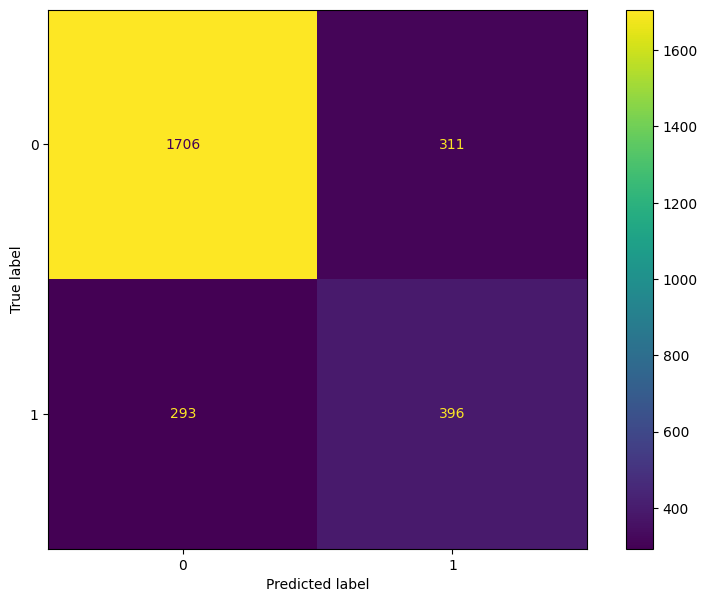

In [ ]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = nb_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=nb_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=nb_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = nb_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2017
           1       0.56      0.57      0.57       689

    accuracy                           0.78      2706
   macro avg       0.71      0.71      0.71      2706
weighted avg       0.78      0.78      0.78      2706



#Neural Network

In [ ]:
from sklearn.preprocessing import StandardScaler
import keras

X = dataset_final.drop(columns='Churn').to_numpy()
y = dataset_final[['Churn']].to_numpy()
y = y.reshape(len(y),)

In [ ]:
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [ ]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,6.765000e+03,6.765000e+03,6.765000e+03,6.765000e+03,6.765000e+03,6.765000e+03,6.765000e+03,6.765000e+03,6.765000e+03,6.765000e+03,6.765000e+03
mean,-6.722060e-17,-1.003057e-16,-1.045070e-16,-3.571094e-17,-1.234128e-16,1.260386e-16,1.817057e-16,5.671738e-17,-1.370670e-16,-2.310708e-17,-9.610445e-17
std,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00
min,-1.731260e+00,-1.440361e+00,-1.538802e+00,-4.389772e-01,-1.279686e+00,-1.544307e+00,-9.989248e-01,-1.012645e+00,-9.652737e-01,-6.510843e-01,-1.199099e+00
25%,-8.678824e-01,-5.039742e-01,-4.504458e-02,-4.389772e-01,-9.536041e-01,-9.749773e-01,-8.308369e-01,-1.012645e+00,-9.652737e-01,-6.510843e-01,-1.199099e+00
50%,3.019819e-03,4.324129e-01,-4.504458e-02,-4.389772e-01,-1.383982e-01,1.852597e-01,-3.903817e-01,9.875133e-01,-9.652737e-01,-6.510843e-01,8.339597e-01
75%,8.648919e-01,4.324129e-01,-4.504458e-02,-4.389772e-01,9.213694e-01,8.342620e-01,6.670728e-01,9.875133e-01,1.035976e+00,1.535899e+00,8.339597e-01
max,1.728269e+00,1.368800e+00,1.448713e+00,2.278023e+00,1.614294e+00,1.791997e+00,2.827818e+00,9.875133e-01,1.035976e+00,1.535899e+00,8.339597e-01


In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [ ]:
def create_model(neurons=1, activation='relu'):
    # create model
    ann = Sequential()
    ann.add(Dense(units = neurons, activation = activation))
    ann.add(Dense(units = 1))
    # Compile model
    ann.compile(optimizer = 'adam', loss ='mean_squared_error')
    return ann

#*Warning : Time to running this model is very long time!!! (around 45minutes)!!!!!*

In [ ]:
# Create the model
nn_clf = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = nn_clf,param_grid = param_grid,cv = KFold(),scoring='recall',verbose = 10)
grid = grid.fit(X_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
43/43 [==============================] - 0s 2ms/step
[CV 1/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  21.4s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
43/43 [==============================] - 0s 3ms/step
[CV 2/5; 1/9] END .....batch_size=10, epochs=10;, score=0.394 total time=  12.4s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
43/43 [==============================] - 0s 1ms/step
[CV 3/5; 1/9] END .....batch_size=10, epochs=10;, score=0.405 total time=  11.8s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
43/43 [==============================] - 0s 2ms/step
[CV 4/5; 1/9] END .....batch_size=10, epochs=10;, score=0.000 total time=  11.2s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................

In [ ]:
# the results
nn_clf = pd.DataFrame(grid.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
nn_clf[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
5,"{'batch_size': 20, 'epochs': 100}",0.462100,1
1,"{'batch_size': 10, 'epochs': 50}",0.447967,2
2,"{'batch_size': 10, 'epochs': 100}",0.429302,3
4,"{'batch_size': 20, 'epochs': 50}",0.413262,4
8,"{'batch_size': 40, 'epochs': 100}",0.362957,5
7,"{'batch_size': 40, 'epochs': 50}",0.354340,6
0,"{'batch_size': 10, 'epochs': 10}",0.252046,7
6,"{'batch_size': 40, 'epochs': 10}",0.217318,8
3,"{'batch_size': 20, 'epochs': 10}",0.166761,9


85/85 [==============================] - 0s 4ms/step


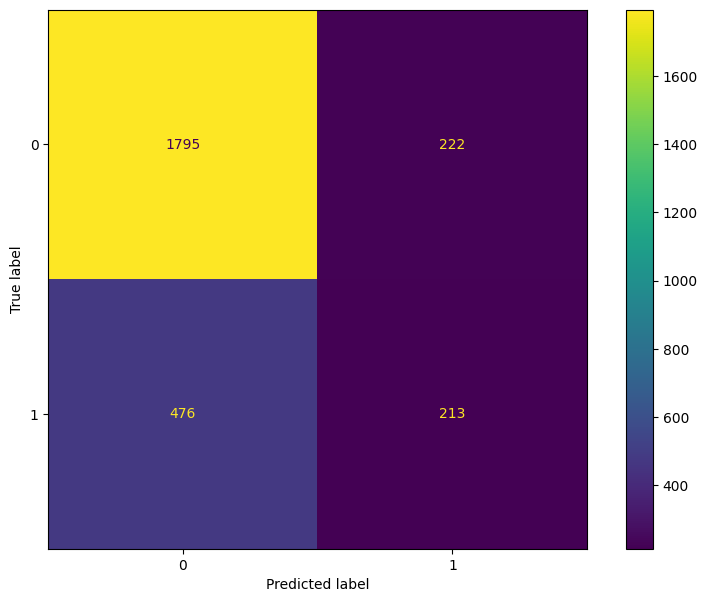

In [ ]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = grid.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=grid.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=grid.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

85/85 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      2017
           1       0.49      0.31      0.38       689

    accuracy                           0.74      2706
   macro avg       0.64      0.60      0.61      2706
weighted avg       0.71      0.74      0.72      2706



# Random Forest

In [ ]:
dataset_final.head(2)

,customerID,PaymentMethod,Contract,SeniorCitizen,Tenure,MonthlyCharges,TotalCharges,Gender,Partner,Dependents,PaperlessBilling,Churn
1,1,0,1,0.0,34.0,56.95,1889.50,1,0,0,0,0
2,2,1,0,0.0,2.0,53.85,108.15,1,0,0,1,1


In [ ]:
dataset_rf = dataset_final.drop(columns=['customerID','Gender','SeniorCitizen','Partner']).copy()

In [ ]:
dataset_rf.head(2)

,PaymentMethod,Contract,Tenure,MonthlyCharges,TotalCharges,Dependents,PaperlessBilling,Churn
1,0,1,34.0,56.95,1889.50,0,0,0
2,1,0,2.0,53.85,108.15,0,1,1


In [ ]:
# the usual splitting
from sklearn.model_selection import train_test_split

X = dataset_rf.drop(columns='Churn').to_numpy()
y = dataset_rf[['Churn']].to_numpy()
y = y.reshape(len(y),)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# define random forest classifier model
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

# note: we use recall
rf_clf_gridcv = GridSearchCV(rf_clf, parameters, cv=5, scoring='recall')
rf_clf_gridcv.fit(X_train, y_train)

CPU times: user 13.3 s, sys: 38.7 ms, total: 13.4 s
Wall time: 13.5 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='recall')

In [ ]:
# the results
cv_result = pd.DataFrame(rf_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
22,"{'max_depth': 5, 'n_estimators': 30}",0.414182,1
21,"{'max_depth': 5, 'n_estimators': 20}",0.413492,2
23,"{'max_depth': 5, 'n_estimators': 40}",0.412096,3
20,"{'max_depth': 5, 'n_estimators': 10}",0.409325,4
24,"{'max_depth': 5, 'n_estimators': 50}",0.399598,5
16,"{'max_depth': 4, 'n_estimators': 20}",0.388470,6
18,"{'max_depth': 4, 'n_estimators': 40}",0.376657,7
17,"{'max_depth': 4, 'n_estimators': 30}",0.376657,7
19,"{'max_depth': 4, 'n_estimators': 50}",0.373183,9
15,"{'max_depth': 4, 'n_estimators': 10}",0.366918,10


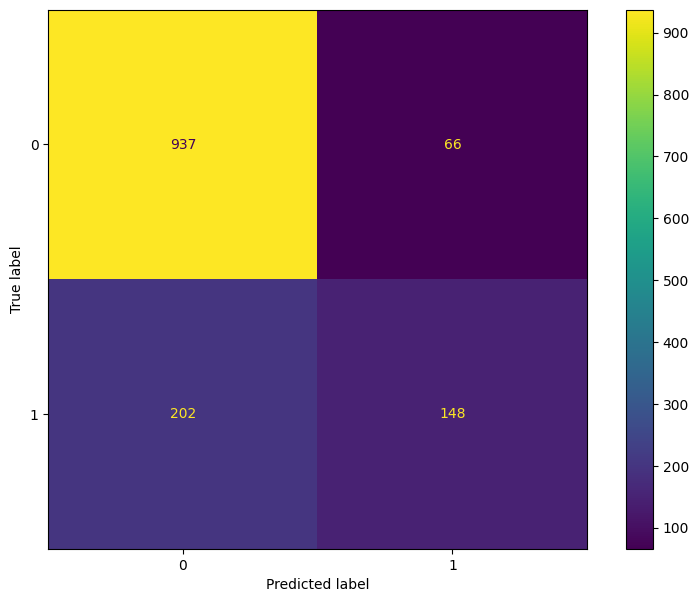

In [ ]:
# the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [ ]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1003
           1       0.69      0.42      0.52       350

    accuracy                           0.80      1353
   macro avg       0.76      0.68      0.70      1353
weighted avg       0.79      0.80      0.78      1353



The best model from KNN Classification, K-Means, Naiv Bayes, Neural Network and RandomForest is Naiv Bayes with the value of recall is 57%

I'am sorry kak parara. I already try the best, but I still can't tuning classifier until make the recall more than 80%